# Dados: importação e tratamento

## Importação de bibliotecas e funções

### Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import json

### Funções

In [2]:
# função que aplica um loop que identifica os valores únicos de todas as colunas do dataframe:

def valores_unicos_colunas(df):
    for col in df.columns:
        print(f'Coluna: {col}')
        print(df[col].unique())
        print('-' * 30)

### Importando os dados

In [3]:
df_churn = pd.read_json('./data/Telco-Customer-Churn.json')
df_churn.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Parece ser um arquivo .json simples de ser normalizado, sem muitos níveis internos.

In [4]:
pd.json_normalize(df_churn['customer'])

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [5]:
pd.json_normalize(df_churn['phone'])

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [6]:
with open('./data/Telco-Customer-Churn.json') as f:
    json = json.load(f)

In [7]:
df_churn = pd.json_normalize(json)
df_churn.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
df_churn.shape

(7267, 21)

### Inspeção primária: nomes das colunas, estruturas dos dados, descrições sumárias e valores únicos

In [9]:
df_churn.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

Temos acesso a um dicionário dos dados que nos permite compreender a natureza dos dados:

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

In [10]:
df_churn.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [11]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [12]:
df_churn.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Idenfiticando valores únicos:

In [13]:
valores_unicos_colunas(df_churn)

Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: Churn
['No' 'Yes' '']
------------------------------
Coluna: customer.gender
['Female' 'Male']
------------------------------
Coluna: customer.SeniorCitizen
[0 1]
------------------------------
Coluna: customer.Partner
['Yes' 'No']
------------------------------
Coluna: customer.Dependents
['Yes' 'No']
------------------------------
Coluna: customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
------------------------------
Coluna: phone.PhoneService
['Yes' 'No']
------------------------------
Coluna: phone.MultipleLines
['No' 'Yes' 'No phone service']
------------------------------
Coluna: internet.InternetService
['DSL' 'Fiber optic' 'No']
---------------------

Algumas observações iniciais:
- A maioria das colunas corresponde ao formato esperado de dado pelo dicionário **a princípio**;
- A coluna 'account.Charges.Total' deveria estar no tipo float, mas está como objeto;
- Há valores faltantes na coluna 'Churn';
- Não há consistência nas variáveis binárias, se deveriam ser 0 e 1 ou 'não' e 'sim'.


Vamos aplicar as correções necessárias

### Limpeza e tratamento dos dados

In [14]:
# df_churn['account.Charges.Total'].astype(float)
# comentando para suprimir a mensagem de erro

Rodando da primeira vez, tem um output
> ValueError: could not convert string to float: ''

ou seja, há valores nulos

In [15]:
df_churn.query('`account.Charges.Total` == " "')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


De cara, podemos perceber que esses clientes possuem a coluna 'tenure' zerada, ou seja, possuem 0 meses de tempo de assinatura, logo, ainda não há uma cobrança somada total. Vamos analisar mais a fundo essa relação examinando melhor as variáveis envolvidas.

In [16]:
df_churn.query('`customer.tenure` == 0 ')[['Churn', 'customer.tenure', 'account.Contract', 'account.Charges.Monthly', 'account.Charges.Total']]

,Churn,customer.tenure,account.Contract,account.Charges.Monthly,account.Charges.Total
975,No,0,Two year,56.05,
1775,No,0,Two year,20.00,
1955,No,0,Two year,61.90,
2075,No,0,One year,19.70,
2232,No,0,Two year,20.25,
2308,No,0,Two year,25.35,
2930,No,0,Two year,73.35,
3134,No,0,Two year,25.75,
3203,No,0,Two year,52.55,
4169,No,0,Two year,80.85,


In [17]:
df_churn.query('`customer.tenure` == 1')[['Churn', 'customer.tenure', 'account.Contract', 'account.Charges.Monthly', 'account.Charges.Total']]

,Churn,customer.tenure,account.Contract,account.Charges.Monthly,account.Charges.Total
17,No,1,Month-to-month,72.10,72.1
19,Yes,1,Month-to-month,25.10,25.1
25,Yes,1,Month-to-month,30.50,30.5
49,No,1,Month-to-month,44.30,44.3
64,Yes,1,Month-to-month,19.85,19.85
...,...,...,...,...,...
7201,Yes,1,Month-to-month,25.05,25.05
7229,Yes,1,Month-to-month,75.30,75.3
7244,No,1,Month-to-month,20.05,20.05
7257,No,1,Month-to-month,18.90,18.9


Uma hipótese que me surgiu inspecionando o dataframe é que apenas os tenure == 0 teriam os tipos de contrato de um ou dois anos, mas uma outra query indica que esse não é o caso:

In [18]:
df_churn.query('`account.Contract` == "One year" ')[['Churn', 'customer.tenure', 'account.Contract', 'account.Charges.Monthly', 'account.Charges.Total']]

,Churn,customer.tenure,account.Contract,account.Charges.Monthly,account.Charges.Total
0,No,9,One year,65.60,593.3
16,No,34,One year,61.25,1993.2
18,Yes,45,One year,62.70,2791.5
20,No,50,One year,25.20,1306.3
26,No,55,One year,103.70,5656.75
...,...,...,...,...,...
7249,No,63,One year,68.80,4111.35
7254,No,53,One year,94.00,4871.45
7258,No,47,One year,84.95,4018.05
7259,No,7,One year,94.05,633.45


Após examinar a natureza de alguns contratos de clientes com poucos meses de tenure, me parece que as modalidades 'month-to-month' são preferencialmente escolhidas por clientes novos. Pode ser uma relação a ser estudada mais a fundo futuramente.

Voltando ao tópico em questão, examinando a relação entre as colunas, fica claro que independente do tipo de contrato, o cálculo de charges.total é sempre aplicado multiplicando a coluna de charges.monthly pelo tempo de contratação em meses (o valor total geralmente é um pouco menor do que a multiplicação exata, provavelmente devido a descontos).

Não é interessante remover esses dados simplesmente por não terem concluído o mês de teste, porque, embora nenhum destes ainda tenha cancelado o serviço (churn = No), poderia sim haver casos de cancelamento nos primeiros dias ou semanas. Para lidar com esses dados, vamos considerar que a maioria das operadoras de telefonia não oferece um período de testes devido à infraestrutura necessária e custos de instalação. Para efeitos práticos, como em todos os modelos de contrato o total é sempre calculado o total com base na cobrança mês a mês, para esses clientes vamos considerar que o primeiro mês já foi pago, e então copiar o valor da coluna account.Charges.Monthly

In [19]:
df_churn.loc[df_churn[df_churn['account.Charges.Total'] == " "].index, 'account.Charges.Total'] = df_churn.loc[df_churn[df_churn['account.Charges.Total'] == " "].index, 'account.Charges.Monthly']

In [20]:
df_churn.query('`customer.tenure` == 0 ')[['Churn', 'customer.tenure', 'account.Contract', 'account.Charges.Monthly', 'account.Charges.Total']]

,Churn,customer.tenure,account.Contract,account.Charges.Monthly,account.Charges.Total
975,No,0,Two year,56.05,56.05
1775,No,0,Two year,20.00,20.0
1955,No,0,Two year,61.90,61.9
2075,No,0,One year,19.70,19.7
2232,No,0,Two year,20.25,20.25
2308,No,0,Two year,25.35,25.35
2930,No,0,Two year,73.35,73.35
3134,No,0,Two year,25.75,25.75
3203,No,0,Two year,52.55,52.55
4169,No,0,Two year,80.85,80.85


Conferindo se ainda há valores em branco:

In [21]:
df_churn.query('`account.Charges.Total` == " "')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


Corrigindo o tipo:

In [22]:
df_churn['account.Charges.Total'] = df_churn['account.Charges.Total'].astype(float)

In [23]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

Se voltarmos à nossa lista de observações:

- A maioria das colunas corresponde ao formato esperado de dado pelo dicionário **a princípio**;

~~- A coluna 'account.Charges.Total' deveria estar no tipo float, mas está como objeto;~~

- Há valores faltantes na coluna 'Churn';
- Não há consistência nas variáveis binárias, se deveriam ser 0 e 1 ou 'não' e 'sim'.


Dando continuidade às outras correções:

In [24]:
df_churn['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [25]:
df_churn.query('Churn == ""')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


Nesse caso, temos 224 colunas em que não há a informação sobre churn, não sabemos se o cliente em questão teve churn ou não. Como não há uma forma correta de estimar justamente a nossa variável de interesse, essas colunas devem ser removidas na nossa base de dados. Uma prática comum nesse ponto é criar um novo dataframe sem as colunas vazias, pois pode ser interessante aplicar outro tratamento a esses dados faltantes.

In [26]:
df_churn_sem_vazio = df_churn[df_churn['Churn'] != ''].copy()
df_churn_sem_vazio.reset_index(drop = True, inplace = True)
df_churn_sem_vazio.shape

(7043, 21)

In [27]:
df_churn_sem_vazio.query('Churn == ""')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


- A maioria das colunas corresponde ao formato esperado de dado pelo dicionário **a princípio**;

~~- A coluna 'account.Charges.Total' deveria estar no tipo float, mas está como objeto;~~

~~- Há valores faltantes na coluna 'Churn';~~

- Não há consistência nas variáveis binárias, se deveriam ser 0 e 1 ou 'não' e 'sim'.


Porém, é importante também checar se há mais algum valor vazio:

In [28]:
df_churn_sem_vazio.isna().sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Não há mais dados vazios, pois tratamos os casos da coluna account.Charges.Monthly anteriormente. Vamos lidar com as variáveis binárias:

In [29]:
colunas_binarias = ['Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']

In [30]:
df_churn_sem_vazio[colunas_binarias]

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,phone.PhoneService,account.PaperlessBilling
0,No,Female,0,Yes,Yes,Yes,Yes
1,No,Male,0,No,No,Yes,No
2,Yes,Male,0,No,No,Yes,Yes
3,Yes,Male,1,Yes,No,Yes,Yes
4,Yes,Female,1,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...
7038,No,Female,0,No,No,Yes,No
7039,Yes,Male,0,Yes,No,Yes,Yes
7040,No,Male,0,No,No,Yes,Yes
7041,No,Male,0,Yes,Yes,Yes,No


In [31]:
valores_unicos_colunas(df_churn_sem_vazio[colunas_binarias])

Coluna: Churn
['No' 'Yes']
------------------------------
Coluna: customer.gender
['Female' 'Male']
------------------------------
Coluna: customer.SeniorCitizen
[0 1]
------------------------------
Coluna: customer.Partner
['Yes' 'No']
------------------------------
Coluna: customer.Dependents
['Yes' 'No']
------------------------------
Coluna: phone.PhoneService
['Yes' 'No']
------------------------------
Coluna: account.PaperlessBilling
['Yes' 'No']
------------------------------


Vamos criar uma consistência no padrão de dados binários. Como há outras colunas categóricas que serão transformadas em colunas do tipo dummy posteriormente, vamos facilitar o processo padronizando 'no' e 'yes' em '0' e '1', assim como a coluna gênero 0 para 'Female' e 1 para 'Male'

In [32]:
bin = {
    'No' : 0,
    'Yes' : 1,
    'Female' : 0,
    'Male' : 1
}

In [33]:
df_churn_sem_vazio[colunas_binarias] = df_churn_sem_vazio[colunas_binarias].replace(bin)
df_churn_sem_vazio[colunas_binarias]

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,phone.PhoneService,account.PaperlessBilling
0,0,0,0,1,1,1,1
1,0,1,0,0,0,1,0
2,1,1,0,0,0,1,1
3,1,1,1,1,0,1,1
4,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...
7038,0,0,0,0,0,1,0
7039,1,1,0,1,0,1,1
7040,0,1,0,0,0,1,1
7041,0,1,0,1,1,1,0


In [34]:
valores_unicos_colunas(df_churn_sem_vazio[colunas_binarias])

Coluna: Churn
[0 1]
------------------------------
Coluna: customer.gender
[0 1]
------------------------------
Coluna: customer.SeniorCitizen
[0 1]
------------------------------
Coluna: customer.Partner
[1 0]
------------------------------
Coluna: customer.Dependents
[1 0]
------------------------------
Coluna: phone.PhoneService
[1 0]
------------------------------
Coluna: account.PaperlessBilling
[1 0]
------------------------------


- A maioria das colunas corresponde ao formato esperado de dado pelo dicionário **a princípio**;

~~- A coluna 'account.Charges.Total' deveria estar no tipo float, mas está como objeto;~~

~~- Há valores faltantes na coluna 'Churn';~~

~~- Não há consistência nas variáveis binárias, se deveriam ser 0 e 1 ou 'não' e 'sim'.~~

Vamos conferir mais uma vez a tipagem dos dados:

In [35]:
df_churn_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   int64  
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

Todas as correções com relação à natureza dos dados necessárias pela primeira inspeção foram aplicadas.

~~- A maioria das colunas corresponde ao formato esperado de dado pelo dicionário **a princípio**;~~

~~- A coluna 'account.Charges.Total' deveria estar no tipo float, mas está como objeto;~~

~~- Há valores faltantes na coluna 'Churn';~~

~~- Não há consistência nas variáveis binárias, se deveriam ser 0 e 1 ou 'não' e 'sim'.~~

Vamos investigar agora se há dados duplicados (e também conferir no dataset original):

In [36]:
print(df_churn_sem_vazio.duplicated().sum(), df_churn.duplicated().sum())

0 0


Há ainda uma modificação a ser aplicada no conjunto de dados a fim de facilitar a inserção em modelos de machine learning, que é aplicar métodos de encoding nas variáveis categóricas não binárias, que eu chamei anteriormente de "dummies". Essa etapa será realizada depois da análise exploratória dos dados pois é interessante preservar a natureza da variável com mais de uma categoria ao visualizá-la, ao invés de trabalhar com várias colunas.

In [37]:
df_limpo = df_churn_sem_vazio.copy()

# Visualizações das variáveis

## Importação de bibliotecas e definições de funções

### Bibliotecas

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

### Funções 
[adaptado do meu projeto do BootCamp de data science aplicada](https://github.com/RPGraciotti/BootCampAlura/blob/main/Projeto_final/Exploratoria.ipynb) 

In [39]:
def plot_bin(df, x, xtitle):
    counts = df[x].value_counts()
    counts.plot(kind = 'bar')
    plt.xticks(rotation = 0)
    plt.xlabel(xtitle)
    plt.show()

def categorical_plot(data, x, xtitle, figszize = (8, 6), rotation = None):
    plt.figure(figsize = (8,6))
    sns.barplot(data = data, x = x, 
            y = data.index, hue = 'Churn', estimator = len, errorbar = None,
            order = data.loc[:,x].sort_values().unique(),
            edgecolor = 'black')
    plt.ylabel('Contagem')
    plt.xticks(rotation = rotation)
    plt.xlabel(xtitle)
    plt.legend(fontsize = 'large',title = 'Churn', labels = ['Não', 'Sim'])
    plt.show()

## Variáveis categóricas

Como vimos anteriormente, nosso conjunto de dados possui diversas variáveis, tanto categóricas quanto contínuas. Podemos analisar as variáveis categóricas tanto do ponto de vista da quantidade de cada variável, quanto a sua relação com a variável de interesse, que é o churn.

Antes de mais nada, vamos examinar a distribuição da variável churn no nosso conjunto de dados:

In [40]:
print(df_limpo['Churn'].value_counts())
print()
print(df_limpo['Churn'].value_counts(normalize = True))

0    5174
1    1869
Name: Churn, dtype: int64

0    0.73463
1    0.26537
Name: Churn, dtype: float64


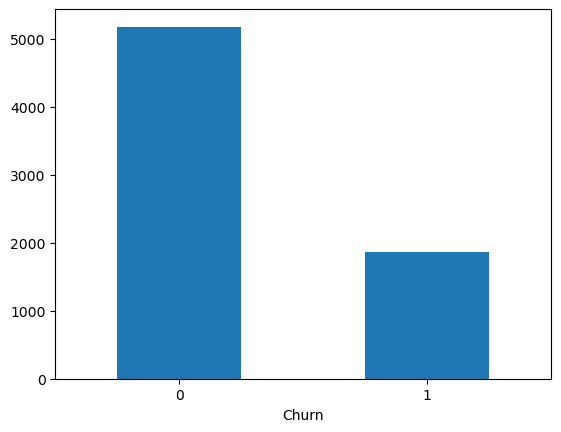

In [41]:
plot_bin(df_limpo, 'Churn', 'Churn')

Temos uma proporção de mais ou menos 26% de churn. Agora, vamos examinar como as outras variáveis categóricas se distribuem com relação ao churn:

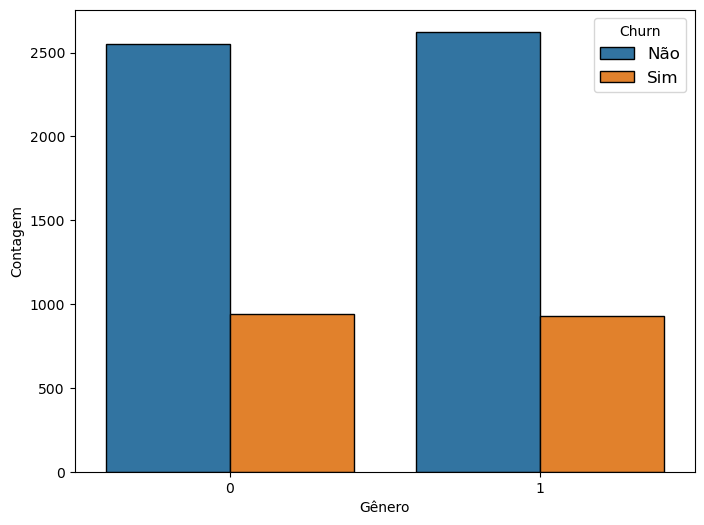

In [42]:
categorical_plot(data = df_limpo, x = 'customer.gender', xtitle = 'Gênero')

Não parece haver diferenças nas proporções tanto do total de homens(1) e mulheres(0), quanto na proporção de cada um com relação a taxa de churning.

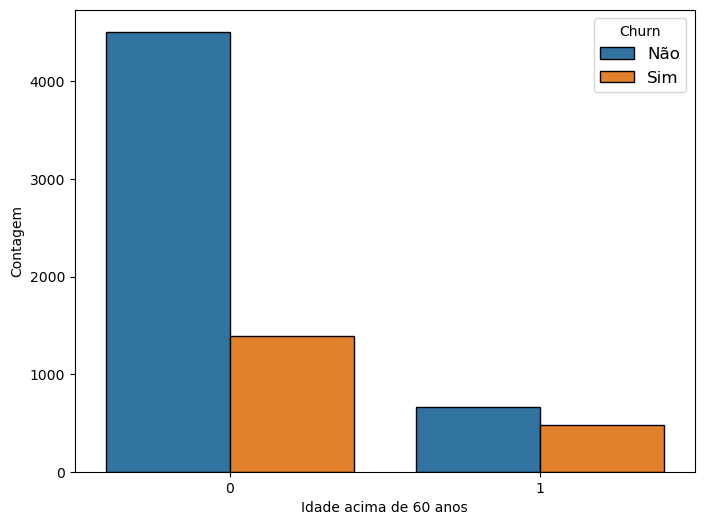

In [43]:
categorical_plot(data = df_limpo, x = 'customer.SeniorCitizen', xtitle = 'Idade acima de 60 anos')

Há uma representatividade muito mais baixa de idosos no banco de dados, porém também podemos notar que proporcionalmente há maior churning entre os idosos.

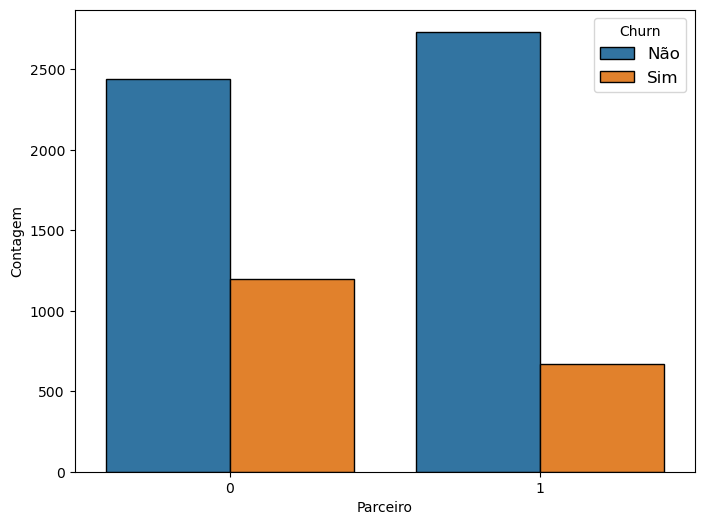

In [44]:
categorical_plot(data = df_limpo, x = 'customer.Partner', xtitle = 'Parceiro')

Há uma certa tendência de clientes sem parceiros a realizar churning.

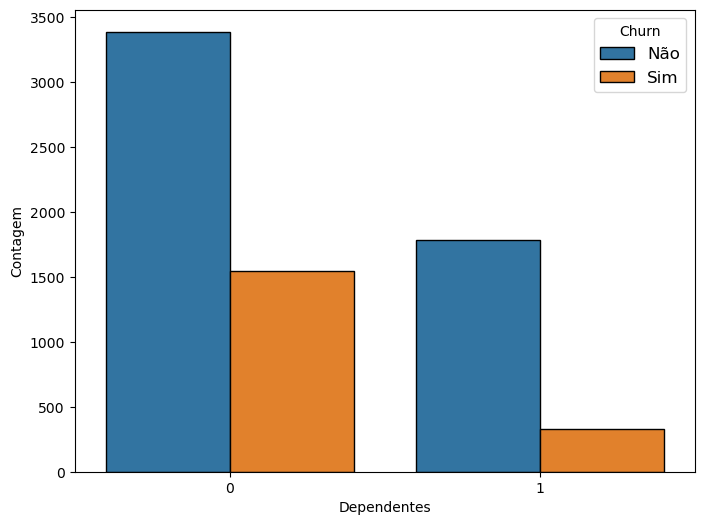

In [45]:
categorical_plot(data = df_limpo, x = 'customer.Dependents', xtitle = 'Dependentes')

Há também uma tendência dos clientes que não possuem dependentes de realizar maior churn.

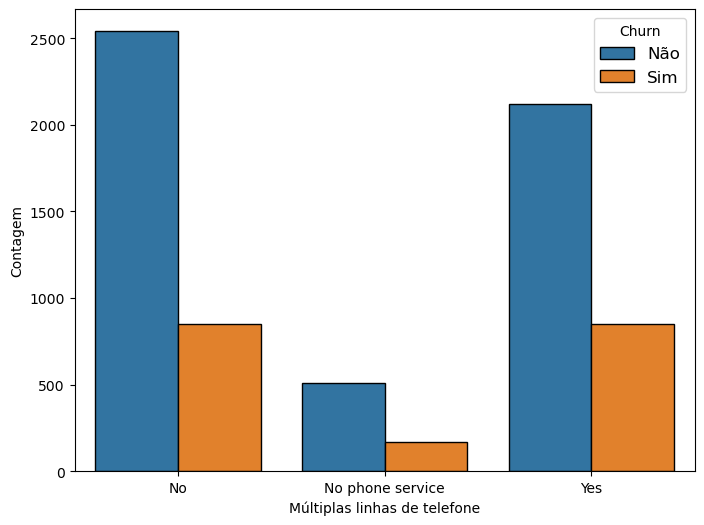

In [46]:
categorical_plot(data = df_limpo, x = 'phone.MultipleLines', xtitle = 'Múltiplas linhas de telefone')

Se separarmos os clientes que não possuem serviço de telefone daqueles que possuem uma ou múltiplas linhas, vemos que há uma proporção pequena daqueles que não possuem nenhuma linha; com relação ao churning não parece haver um padrão entre aqueles que possuem uma ou mais linhas.

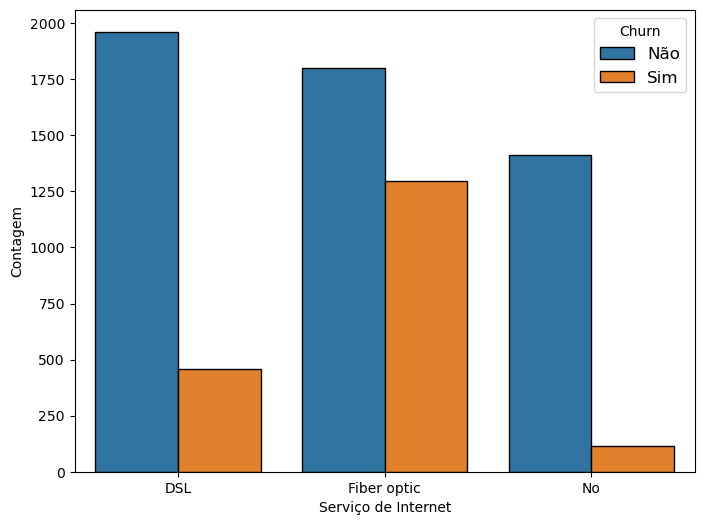

In [47]:
categorical_plot(data = df_limpo, x = 'internet.InternetService', xtitle = 'Serviço de Internet')

Quanto ao tipo de internet, notamos que há uma tendência muito alta dos clientes com fibra ótica de desistirem do serviço.

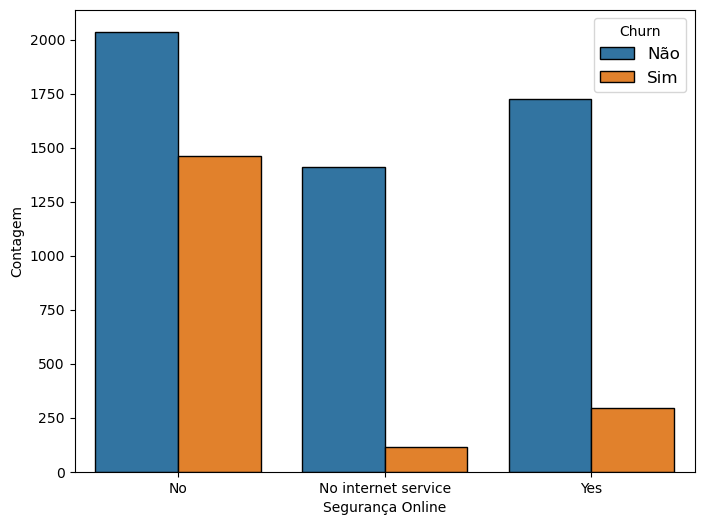

In [48]:
categorical_plot(data = df_limpo, x = 'internet.OnlineSecurity', xtitle = 'Segurança Online')

Também notamos uma tendência muito alta de churn em clientes que não posuem sistema de segurança online.

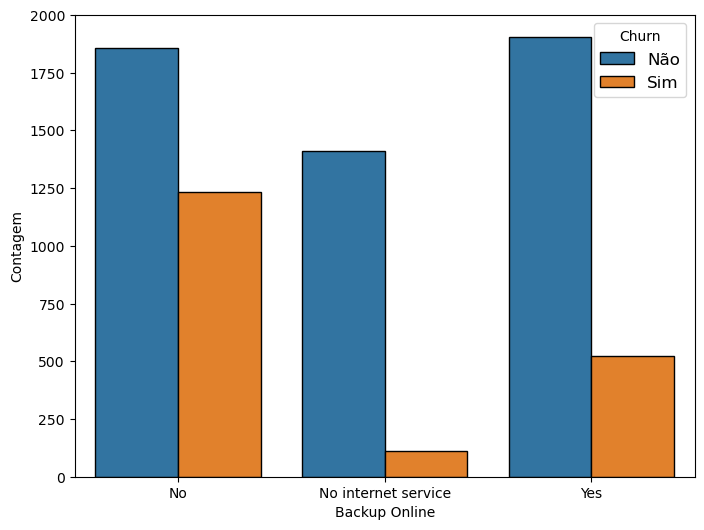

In [49]:
categorical_plot(data = df_limpo, x = 'internet.OnlineBackup', xtitle = 'Backup Online')

Assim como a mesma tendência se repete para aqueles clientes que não fazem uso do serviço de backup online.

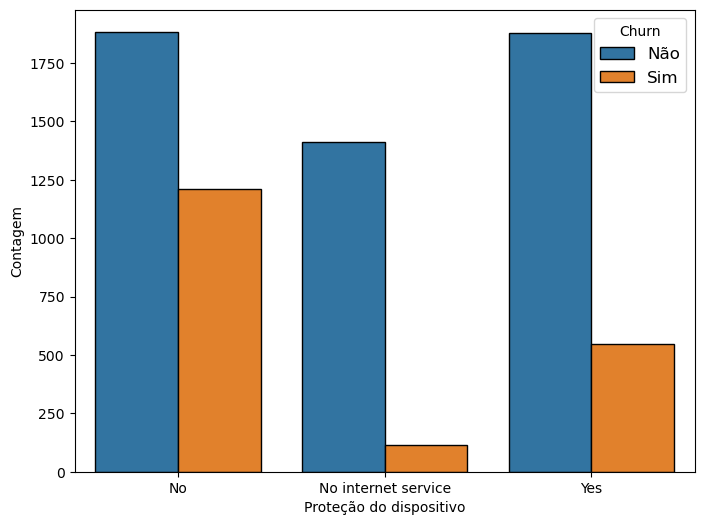

In [50]:
categorical_plot(data = df_limpo, x = 'internet.DeviceProtection', xtitle = 'Proteção do dispositivo')

Mais uma vez, também há maior tendência de churn para aqueles que não utilizam serviços de proteção do dispositivo.

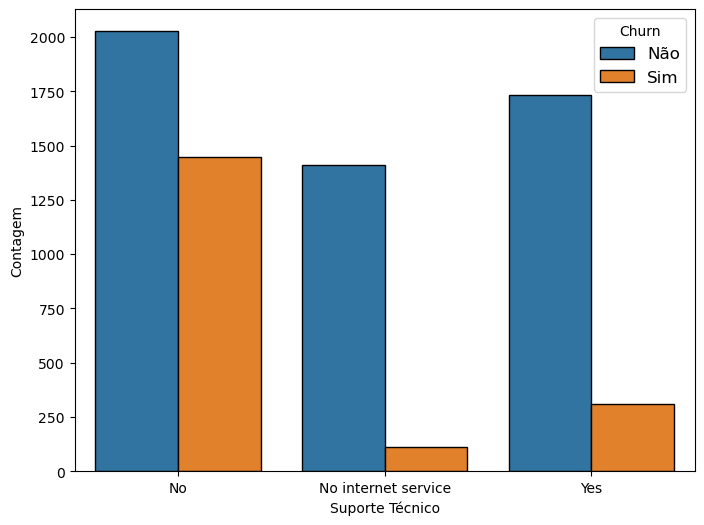

In [51]:
categorical_plot(data = df_limpo, x = 'internet.TechSupport', xtitle = 'Suporte Técnico')

Por fim, confirmando o perfil dos clientes que não optam por serviços de segurança e suporte, aquele que não utilizam suporte técnico também apresentam maior tendência de churning.

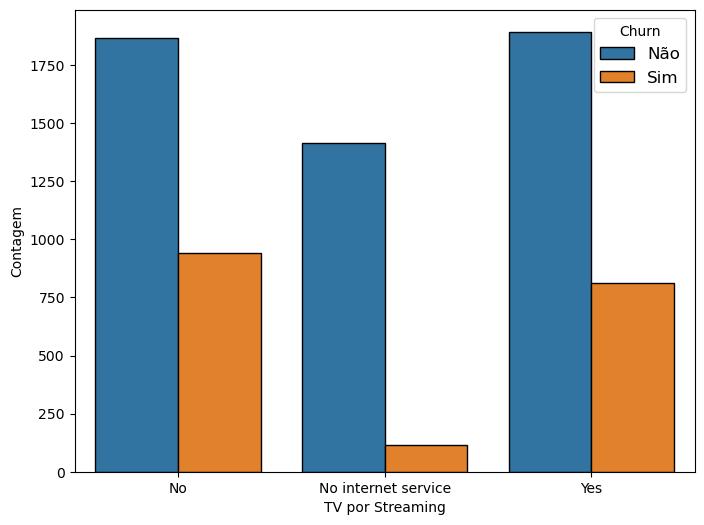

In [52]:
categorical_plot(data = df_limpo, x = 'internet.StreamingTV', xtitle = 'TV por Streaming')

O serviço de TV por streaming não parece influenciar muito o padrão de churning.

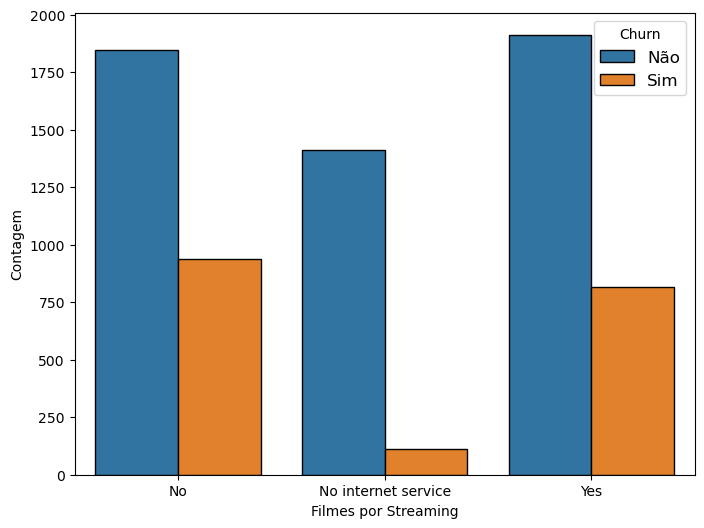

In [53]:
categorical_plot(data = df_limpo, x = 'internet.StreamingMovies', xtitle = 'Filmes por Streaming')

Assim como também a categoria de filmes por streaming.

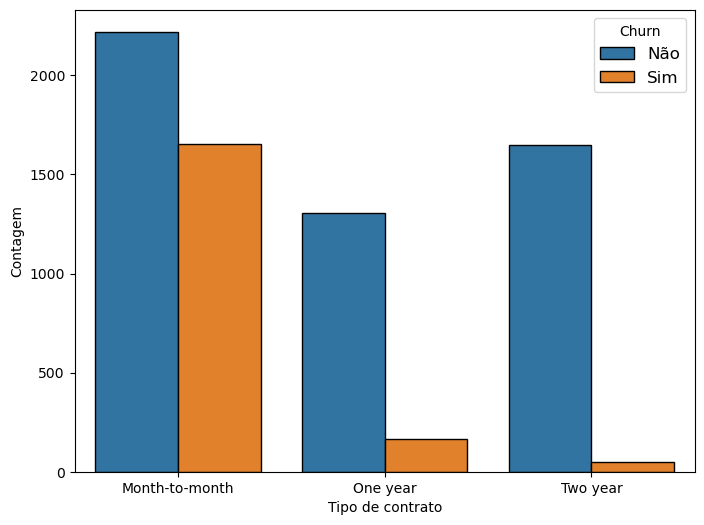

In [54]:
categorical_plot(data = df_limpo, x = 'account.Contract', xtitle = 'Tipo de contrato')

Notamos que o modelo de contrato mês-a-mês é campeão absoluto em churning, com relação aos modelos de um ou dois anos.

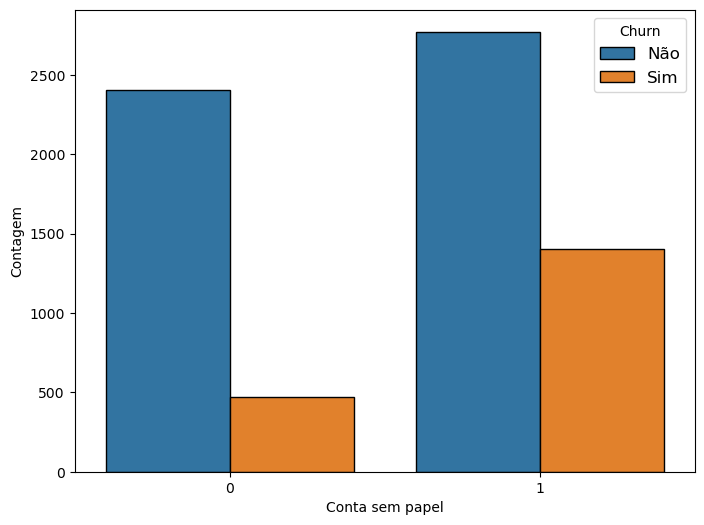

In [55]:
categorical_plot(data = df_limpo, x = 'account.PaperlessBilling', xtitle = 'Conta sem papel')

A conta "sem papel", ou seja, somente por meios eletrônicos também apresenta maior taxa de churning.

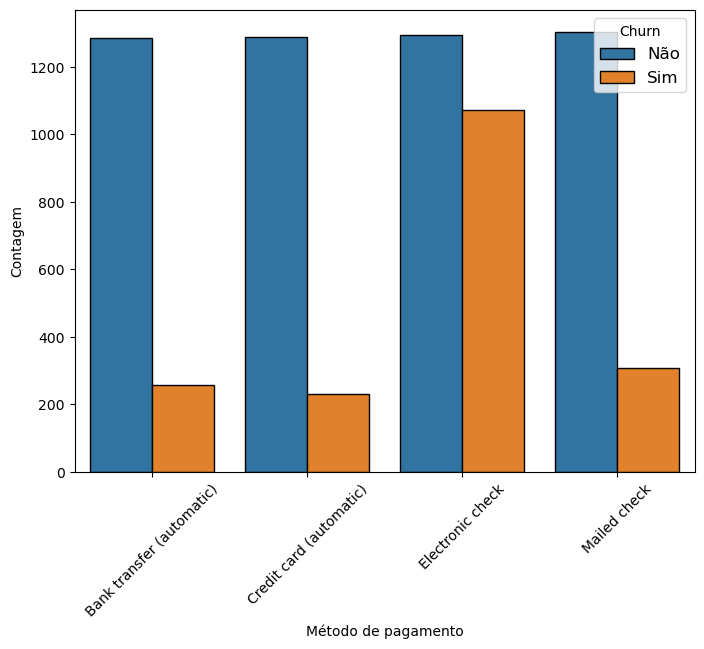

In [56]:
categorical_plot(data = df_limpo, x = 'account.PaymentMethod', xtitle = 'Método de pagamento', rotation = 45)

O método de pagamento através de cheque eletrônico também apresenta taxa bastante alta de churning.

Analisando as variáveis categóricas, o padrão que se desenha de cliente com maior taxa de churn é aquele que não possui parceiros ou dependentes e opta por serviços mais básicos de internet, sem suporte técnico e benfeitorias associadas. 

Se destaca também a relação entre modalidade do contrato, tipo de pagamento e conta: o maior churning é entre clientes que utilizam do contrato mês a mês, não recebem a conta em papel e pagam por meio de cheque eletrônico. Minha hipótese é que esse cancelamento maior pode ocorrer também por descuido desses clientes que não recebem a conta em papel todo mês e acabam por não pagar a conta a tempo, gerando eventuais multas e/ou débitos.

Por fim, quanto ao tipo de serviço oferecido pela empresa, fica claro que a proporção dos clientes que mais cancelam o serviço é aqueles que utilizam a fibra ótica. Isso pode indicar um problema grave na qualidade do serviço de fibra ótica, que pode estar longe do ideal e a precariedade do serviço leva ao cancelamento pelos clientes.

## Variáveis contínuas

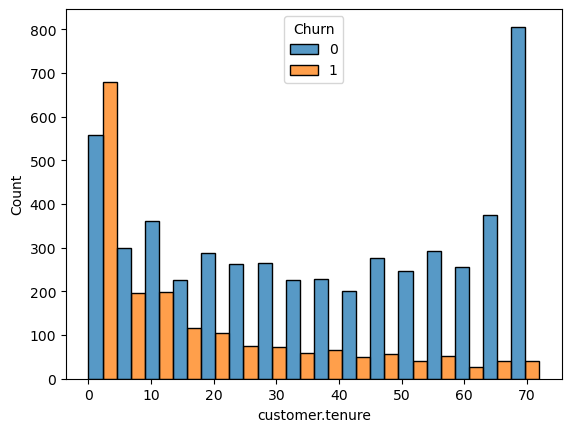

In [57]:
## Melhorar formatação do gráfico!!

sns.histplot(data = df_limpo, x = 'customer.tenure', hue = 'Churn', multiple = 'dodge')
plt.show()

Podemos notar que a retenção dos clientes é maior conforme o tempo em que eles assinam o serviço, com maior taxa de churning entre aqueles que com menor tempo de assinatura, e baixo churning com maior tempo de assinatura.

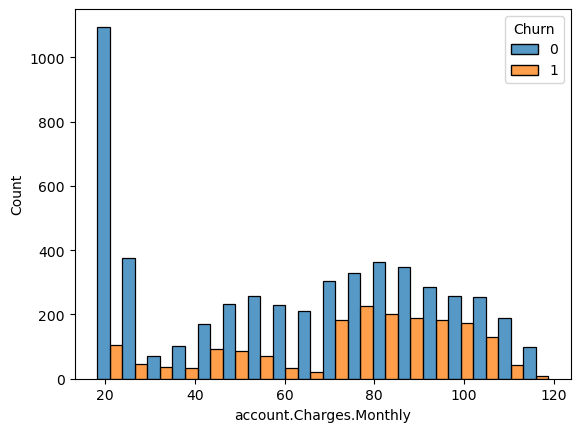

In [58]:
sns.histplot(data = df_limpo, x = 'account.Charges.Monthly', hue = 'Churn', multiple = 'dodge')
plt.show()

Aqui há um padrão interessante: aqueles que pagam pouco por mês tem uma retenção bastante alta, além de um número bastante expressivo de clientes no total.

<Axes: xlabel='account.Charges.Total', ylabel='Count'>

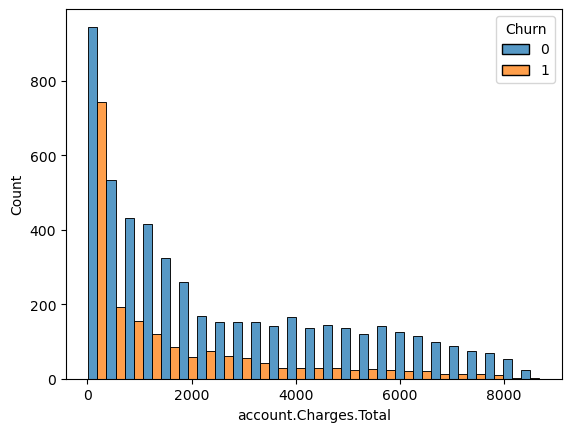

In [59]:
sns.histplot(data = df_limpo, x = 'account.Charges.Total', hue = 'Churn', multiple = 'dodge')

Porém, ao se multiplicar o gasto por mês com o total de tempo de assinatura, vemos novamente o padrão conforme o tempo de assinatura: o maior churning é entre os clientes que pagaram pouco no total devido ao menor tempo de assinatura.

## Correlações

Após essa inspeção visual dos dados, também é possível implementar um teste estatístico que vai examinar se de fato há correlações das variáveis com a probabilidade de churn.

Há dois caminhos possíveis para analisar as correlações.
- Para as variáveis categóricas, é possível testar a correlação usando um teste de qui-quadrado. Esse teste é utilizado para comparar a distribuição de uma varíavel com o padrão esperado pela hipótese nula. No nosso caso, a hipótese nula descreve que, para cada par de variável categórica com a variável de interesse, não há relação alguma.
- Para as variáveis contínuas, o teste indicado para testar a correlação é uma variação do teste de Pearson aplicada quando a variável resposta é de natureza binária, a correlação ponto-biserial. O racional desse teste parte da mesma premissa, em que a hipótese nula dita que as duas variáveis são distribuidas ao acaso.

### Variáveis categóricas:

Implementação de um teste de qui-quadrado para múltiplas variáveis categóricas (adaptado de https://medium.com/@ritesh.110587/correlation-between-categorical-variables-63f6bd9bf2f7):

In [60]:
# Bibliotecas necessárias

import os as os
from itertools import product
import scipy.stats as ss

In [61]:
# Criando dataframe só de variáveis categóricas e variável de interesse:
df_cat = df_limpo[['Churn','customer.gender','customer.SeniorCitizen','customer.Partner','customer.Dependents','phone.PhoneService','phone.MultipleLines','internet.InternetService','internet.OnlineSecurity','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies','account.Contract','account.PaperlessBilling','account.PaymentMethod']]

cat_var = ['customer.gender','customer.SeniorCitizen','customer.Partner','customer.Dependents','phone.PhoneService','phone.MultipleLines','internet.InternetService','internet.OnlineSecurity','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies','account.Contract','account.PaperlessBilling','account.PaymentMethod']

# Criando pares de teste de correlação:
cat_var_prod = []
for i in range(0, len(cat_var)):
    cat_var_prod.append((cat_var[i] , 'Churn'))

In [62]:
# Aplicando o teste e criando tabela de contingência com os valores de p:

result = []

for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0], i[1], list(ss.chi2_contingency(pd.crosstab(
            df_cat[i[0]], df_cat[i[1]]
        )))[1]))

chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff']).pivot(index = 'var1', columns = 'var2', values = 'coeff')

chi_test_output

var2,Churn
var1,
account.Contract,5.863038e-258
account.PaperlessBilling,4.073355e-58
account.PaymentMethod,3.682355e-140
customer.Dependents,4.924922e-43
customer.Partner,2.139911e-36
customer.SeniorCitizen,1.510067e-36
customer.gender,4.865787e-01
internet.DeviceProtection,5.505219e-122
internet.InternetService,9.571788e-160


Essa tabela é o resultado dos testes de qui-quadrado para cada par variável categórica-churn. Cada célula representa o valor de p, que nosso caso representa a chance daquela variável categórica ser independente do churn. Ou seja, em teoria, quanto menor o valor de p, menor a chance de duas variáveis não estarem correlacionadas, portanto, maior a correlação da variável com churn. Idealmente, dizemos que quando o valor de é p <= 0.05 (alfa ou nível de significância), rejeitamos a hipótese nula e dizemos que as variáveis em questão estão correlacionadas. Vamos comparar a nossa tabela com o nível de significância:

In [63]:
chi_test_output <= 0.05

var2,Churn
var1,
account.Contract,True
account.PaperlessBilling,True
account.PaymentMethod,True
customer.Dependents,True
customer.Partner,True
customer.SeniorCitizen,True
customer.gender,False
internet.DeviceProtection,True
internet.InternetService,True


Logo, vemos que todas as variáveis exceto "gênero" e "serviço de telefone" apresentam valor de p < 0.05, portanto rejeitamos a hipótese nula de não correlação e dizemos que essas variáveis estão correlacionadas. Portanto, "gênero" e "serviço de telefone" **não estão** correlacionadas com a nossa variável de interesse.

É interessante notar também que a informação da coluna "serviço de telefone" também já está embutida na coluna "multiplas linhas", e essa redundância também deve ser evitada, mais um motivo para retirá-la do conjunto final.

### Variáveis contínuas:

Podemos aplicar um teste de correlação de Pearson utilizando a função corr() diretamente do pandas. A implementação do teste de correlação ponto-biserial é a mesma da correlação de Pearson, em que precisariamos apenas transformar a variável de interesse em 0 e 1, e isso já fizemos anteriormente. Dessa forma, podemos testar a correlação entre todas as variáveis contínuas e também delas com a variável de churn. Ao invés de testar a hipótese nos termos de valor de significância e p-valor, podemos interpretar o valor do resultado (x) como a 'força da correlação': quando não há correlação, o valor é 0, quanto mais próximo de -1, forte correlação negativa, quanto mais próximo de 1, forte correlação positiva.

In [64]:
df_cont = df_limpo[['Churn','customer.tenure','account.Charges.Monthly','account.Charges.Total']]
m_corr = df_cont.corr()
m_corr.where(np.tril(np.ones(m_corr.shape).astype(bool), k = 0)) # mostrando apenas matriz inferior

,Churn,customer.tenure,account.Charges.Monthly,account.Charges.Total
Churn,1.000000,NaN,NaN,NaN
customer.tenure,-0.352229,1.000000,NaN,NaN
account.Charges.Monthly,0.193356,0.247900,1.000000,NaN
account.Charges.Total,-0.198347,0.826164,0.651182,1.0


Podemos interpretar que, obviamente há uma relação muito forte entre o tempo de assinatura de serviço (tenure) com o total cobrado, pois vimos anteriormente que um é o produto de outro. Porém estamos mais interessados nas correlações com a variável churn. Vemos que há sim correlações, pois nenhum valor é 0, e que há maior correlação negativa entre o tempo de assinatura com o churn; assim como também uma correlação negativa entre o total cobrado e churn. Isso corrobora nossas hipóteses de que há maior churning naqueles clientes com pouco tempo de assinatura, e que há maior retenção em clientes que pagam pouco mês a mês.

# Modelos de machine learning

## Compilação e formatação correta dos dados para implementação de machine learning

Vimos anteriormente que o ideal seria remover as colunas de gênero e serviço de telefone, pois não são informativas.

In [65]:
df_limpo.drop(columns = ['customer.gender','phone.PhoneService'], inplace = True)
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.SeniorCitizen     7043 non-null   int64  
 3   customer.Partner           7043 non-null   int64  
 4   customer.Dependents        7043 non-null   int64  
 5   customer.tenure            7043 non-null   int64  
 6   phone.MultipleLines        7043 non-null   object 
 7   internet.InternetService   7043 non-null   object 
 8   internet.OnlineSecurity    7043 non-null   object 
 9   internet.OnlineBackup      7043 non-null   object 
 10  internet.DeviceProtection  7043 non-null   object 
 11  internet.TechSupport       7043 non-null   object 
 12  internet.StreamingTV       7043 non-null   object 
 13  internet.StreamingMovies   7043 non-null   objec

Vamos agora prosseguir com outro tratamento importante, o encoding dos dados. O encoding é a codificação de variáveis categóricas com mais de uma categoria em algum outro padrão que vai ser melhor intepretado pelos modelos de machine learning. No nosso caso utilizarei o método de one hot encoding, que transforma cada categoria de cada variável em uma nova variável e faz correspondência do valor observado entre 0 e 1.

In [66]:
df_limpo.head()

,customerID,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,0,1,1,9,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,0,0,0,9,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,0,0,0,4,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,1,1,0,13,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,1,1,0,3,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40


In [67]:
df_dummies = pd.get_dummies(df_limpo, columns = ['phone.MultipleLines','internet.InternetService','internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies','account.Contract','account.PaymentMethod'])

Importante notar que, ao fazermos isso, criamos redundância nos dados: muitas colunas referentes aos serviços que o cliente assina possuem a categoria "não possui serviço de internet". Logicamente, essa informação se repete para o mesmo cliente cada vez que esse não possui serviço de internet:

In [68]:
# O resultado é True quando todos os ids de clientes que não possuem serviço de internet forem os mesmos ids de clientes que apresentam o valor "no internet service" em outra coluna relacionada, por exemplo 'internet.OnlineSecurity'
all(df_limpo.query('`internet.InternetService` == "No"')['customerID'] == df_limpo.query('`internet.OnlineSecurity` == "No internet service"')['customerID'])

True

In [69]:
df_dummies.columns

Index(['customerID', 'Churn', 'customer.SeniorCitizen', 'customer.Partner',
       'customer.Dependents', 'customer.tenure', 'account.PaperlessBilling',
       'account.Charges.Monthly', 'account.Charges.Total',
       'phone.MultipleLines_No', 'phone.MultipleLines_No phone service',
       'phone.MultipleLines_Yes', 'internet.InternetService_DSL',
       'internet.InternetService_Fiber optic', 'internet.InternetService_No',
       'internet.OnlineSecurity_No',
       'internet.OnlineSecurity_No internet service',
       'internet.OnlineSecurity_Yes', 'internet.OnlineBackup_No',
       'internet.OnlineBackup_No internet service',
       'internet.OnlineBackup_Yes', 'internet.DeviceProtection_No',
       'internet.DeviceProtection_No internet service',
       'internet.DeviceProtection_Yes', 'internet.TechSupport_No',
       'internet.TechSupport_No internet service', 'internet.TechSupport_Yes',
       'internet.StreamingTV_No', 'internet.StreamingTV_No internet service',
       'intern

In [70]:
df_dummies['internet.InternetService_No'].equals(df_dummies['internet.OnlineSecurity_No internet service'])

True

In [71]:
df_dummies[['customerID','internet.InternetService_No','internet.OnlineSecurity_No internet service']]

,customerID,internet.InternetService_No,internet.OnlineSecurity_No internet service
0,0002-ORFBO,0,0
1,0003-MKNFE,0,0
2,0004-TLHLJ,0,0
3,0011-IGKFF,0,0
4,0013-EXCHZ,0,0
...,...,...,...
7038,9987-LUTYD,0,0
7039,9992-RRAMN,0,0
7040,9992-UJOEL,0,0
7041,9993-LHIEB,0,0


Se fizermos as correlações, veremos que essas colunas são idênticas, e, portanto, redundantes. Devemos então removê-las.

In [72]:
df_dummies.filter(like = 'No internet service').describe()

,internet.OnlineSecurity_No internet service,internet.OnlineBackup_No internet service,internet.DeviceProtection_No internet service,internet.TechSupport_No internet service,internet.StreamingTV_No internet service,internet.StreamingMovies_No internet service
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.216669,0.216669,0.216669,0.216669,0.216669,0.216669
std,0.412004,0.412004,0.412004,0.412004,0.412004,0.412004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
df_dummies.filter(like = 'No internet service').corr()

,internet.OnlineSecurity_No internet service,internet.OnlineBackup_No internet service,internet.DeviceProtection_No internet service,internet.TechSupport_No internet service,internet.StreamingTV_No internet service,internet.StreamingMovies_No internet service
internet.OnlineSecurity_No internet service,1.0,1.0,1.0,1.0,1.0,1.0
internet.OnlineBackup_No internet service,1.0,1.0,1.0,1.0,1.0,1.0
internet.DeviceProtection_No internet service,1.0,1.0,1.0,1.0,1.0,1.0
internet.TechSupport_No internet service,1.0,1.0,1.0,1.0,1.0,1.0
internet.StreamingTV_No internet service,1.0,1.0,1.0,1.0,1.0,1.0
internet.StreamingMovies_No internet service,1.0,1.0,1.0,1.0,1.0,1.0


In [74]:
cols_to_remove = df_dummies.filter(like = 'No internet service').columns
df_dummies.drop(columns = cols_to_remove, inplace = True)

In [75]:
# Agora teremos somente a correlação de 1 na diagonal principal
df_dummies.corr()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,phone.MultipleLines_No,phone.MultipleLines_No phone service,...,internet.StreamingTV_Yes,internet.StreamingMovies_No,internet.StreamingMovies_Yes,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
Churn,1.000000,0.150889,-0.150448,-0.164221,-0.352229,0.191825,0.193356,-0.198347,-0.032569,-0.011942,...,0.063228,0.130845,0.061382,0.405103,-0.177820,-0.302253,-0.117937,-0.134302,0.301919,-0.091683
customer.SeniorCitizen,0.150889,1.000000,0.016479,-0.211185,0.016567,0.156530,0.220173,0.102997,-0.136213,-0.008576,...,0.105378,0.034210,0.120176,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
customer.Partner,-0.150448,0.016479,1.000000,0.452676,0.379697,-0.014877,0.096848,0.317532,-0.129929,-0.017706,...,0.124666,-0.117529,0.117412,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125
customer.Dependents,-0.164221,-0.211185,0.452676,1.000000,0.159712,-0.111377,-0.113890,0.062124,0.023198,0.001762,...,-0.016558,-0.078198,-0.039741,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071
customer.tenure,-0.352229,0.016567,0.379697,0.159712,1.000000,0.006152,0.247900,0.826164,-0.323088,-0.008448,...,0.279756,-0.252220,0.286111,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
account.PaperlessBilling,0.191825,0.156530,-0.014877,-0.111377,0.006152,1.000000,0.352150,0.158562,-0.151864,-0.016505,...,0.223841,0.059488,0.211716,0.169096,-0.051391,-0.147889,-0.016332,-0.013589,0.208865,-0.205398
account.Charges.Monthly,0.193356,0.220173,0.096848,-0.113890,0.247900,0.352150,1.000000,0.651182,-0.338314,-0.247398,...,0.629603,0.018075,0.627429,0.060165,0.004904,-0.074681,0.042812,0.030550,0.271625,-0.377437
account.Charges.Total,-0.198347,0.102997,0.317532,0.062124,0.826164,0.158562,0.651182,1.000000,-0.396077,-0.113203,...,0.514999,-0.202186,0.520124,-0.444299,0.170807,0.354539,0.185994,0.182913,-0.059268,-0.295740
phone.MultipleLines_No,-0.032569,-0.136213,-0.129929,0.023198,-0.323088,-0.151864,-0.338314,-0.396077,1.000000,-0.315431,...,-0.267528,0.013076,-0.275256,0.086740,0.002098,-0.102937,-0.070178,-0.063921,-0.080836,0.222605
phone.MultipleLines_No phone service,-0.011942,-0.008576,-0.017706,0.001762,-0.008448,-0.016505,-0.247398,-0.113203,-0.315431,1.000000,...,0.022574,0.112254,0.032959,0.000742,0.002791,-0.003519,-0.007556,0.007721,-0.003062,0.003319


Findado o processo de preparo dos dados, vou renomear o conjunto de dados:

In [76]:
df_final = df_dummies.copy()

### Balanceamento da variável resposta

Já examinamos a distribuição da variável reposta, churn, anteriormente:

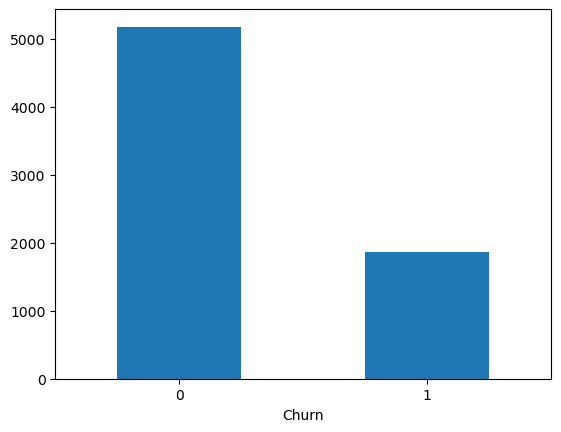

A quantidade de clientes que não tiveram churn em relação aos que tiveram é cerca de 2.8 vezes maior.


In [77]:
plot_bin(df_final, 'Churn', 'Churn')

razao = df_final['Churn'].value_counts().values[0]/df_final['Churn'].value_counts().values[1]

print(f'A quantidade de clientes que não tiveram churn em relação aos que tiveram é cerca de {razao:.2} vezes maior.')

Temos então uma variável resposta desbalanceada. Para tratar essa questão, escolhi um método que combina under e over sampling como sugerido pela própria biblioteca [imbalanced-learn](https://imbalanced-learn.org/stable/combine.html).

Nessa rodada inicial de exploração dos métodos de sampling e teste de modelos, irei realizar a separação entre os dados de treino e de teste de forma estratificada e testarei as métricas dos modelos através do algoritmo de [Repeated](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html#sklearn.model_selection.RepeatedStratifiedKFold) [Stratified K fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html). Depois pretendo automatizar o processo testando diferentes modelos refatorando o código em forma de funções que aplicam todo o prcoesso de resampling e validação cruzada.

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from imblearn.combine import SMOTEENN

In [79]:
# Formatação para input em modelos de machine learning
df_sample = df_final.sample(frac = 1).reset_index(drop = True)
y = df_sample['Churn']
y = y.rename('target')
X = df_sample.drop(['Churn','customerID'], axis = 1)
split = train_test_split(X, y, stratify = y, test_size = 0.2)

# Split[0] == X_train
# Split[1] == X_test
# Split[2] == y_train
# Split[3] == y_test

In [80]:
# Aplicação do método
smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(split[0], split[2])

In [81]:
# Proporção final
y_resampled.value_counts(normalize = True)

1    0.544437
0    0.455563
Name: target, dtype: float64

# Implementação de modelos de classificação por machine learning

Um bom ponto de partida para modelos de classificação binária é um algoritmo de [regressão logística](https://www.ibm.com/br-pt/topics/logistic-regression).

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [83]:
m1 = LogisticRegression(max_iter = 10000)
m1.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=10000)

### Inspeção inicial das métricas

In [84]:
# Acurácia através de cross validation

m1_result = cross_validate(m1, X = X, y = y, cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 10), scoring = 'accuracy')

print(np.mean(m1_result['test_score']))
print(np.std(m1_result['test_score']))


0.8033083787663722
0.007993995221262649


In [85]:
# ROC AUC atráves de cross validation

m1_result = cross_validate(m1, X = X, y = y, cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 10), scoring = 'roc_auc')

print(np.mean(m1_result['test_score']))
print(np.std(m1_result['test_score']))

0.8444952037772393
0.009825811783775359


Os resultados iniciais parecem promissores, com uma acurácia média de 80 % e [AUC](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/) de 85%, ambos com desvio padrão baixo.

Isso me leva a crer que estamos no caminho correto com as implementações de resampling dos dados para reduzir o desbalanceamento da variável de interesse e testando as métricas através de validação cruzada. Vamos prosseguir então para a padronização das etapas de preparação dos dados e implementação de modelos e teste, para que possamos realizar diversas rodadas de teste.

## Padronização das etapas de preparação

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
# Split dos dados com o mesmo padrão:
df_sample = df_final.sample(frac = 1, random_state = 42).reset_index(drop = True)
y_or = df_sample['Churn']
y_or = y_or.rename('target')
X_or = df_sample.drop(['Churn','customerID'], axis = 1)
split = train_test_split(X_or, y_or, stratify = y_or, test_size = 0.2, random_state = 42)

# Padronização do resampling com SMOTEENN
smote_enn = SMOTEENN(random_state = 42)
X_resampled, y_resampled = smote_enn.fit_resample(X = split[0], y = split[2])

# Padronização do cross validation
cv = RepeatedStratifiedKFold(random_state = 42)

# Normalização escalar

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

In [88]:
# Função que testa as métricas de avaliação do modelo:
def model_eval(x, y, model, cv):

    results = cross_validate(model, X = x, y = y, cv = cv, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
    acc = results['test_accuracy']
    prec = results['test_precision']
    rec = results['test_recall']
    f1 = results['test_f1']
    roc_auc = results['test_roc_auc']
    scores = pd.DataFrame(dict(Acurácia = acc, Precisão = prec, Recall = rec, F1 = f1, ROC_AUC = roc_auc))
    table = scores.describe().loc[['mean','std']]
    table.rename(index = {'mean': 'Média', 'std': 'Desvio Padrão'}, inplace = True)

    return table



Em modelos de classificação, 4 métricas são geralmente utilizadas para examinar a performance geral dos modelos: acurácia, precisão, recall e F1. A acurácia é a medida mais tradicional de inspeção da qualidade do modelo, de forma geral ela mede quantas classificações feitas pelo modelo correspondem aos valores reais. Entretanto, as outras medidas também oferecem insights interessantes sobre o comportamento de modelos. A precisão mede a capacidade do modelo de não cometer falsos positivos, enquanto o recall mede a capacidade do modelo não cometer falsos negativos. A métrica de f1-score é a média harmônica entre a precisão e recall, e, portanto, pode representar um balanço interessante da detecção de falsos positivos e falsos negativos. 

No nosso caso, um falso positivo é quando o modelo identifica que um cliente cancelou o serviço quando não o fez, e o falso negativo quando o cliente não cancelou o serviço quando o fez. Idealmente queremos evitar ambos os casos. Porém, o recall nesse caso pode se mostrar mais relevante caso surja a necessidade, pois, é mais vantajoso detectar corretamente quais clientes estão deixando de assinar o serviço (churn) para que as medidas de retenção tenham esse público em mente. 

Uma última métrica interessante de se analisar é a área sob a curva ROC (ROC_AUC), que expressa como varia a taxa de verdadeiro positivo em função de falso positivo. Também é uma medida geralmente analisada de forma complementar a sumarizar as propriedades gerais do modelo.

## Teste de modelos
### Regressão logística

In [232]:
m1 = LogisticRegression(max_iter = 500)
m1.fit(X_resampled, y_resampled)

model_eval(model = m1, x = X_or, y = y_or, cv = cv)

,Acurácia,Precisão,Recall,F1,ROC_AUC
Média,0.803480,0.654915,0.549814,0.597404,0.844495
Desvio Padrão,0.009107,0.022947,0.025619,0.019933,0.009067


### RandomForest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [233]:
m2 = RandomForestClassifier()
m2.fit(X_resampled, y_resampled)

model_eval(x = X_or, y = y_or, model = m2, cv = cv)

,Acurácia,Precisão,Recall,F1,ROC_AUC
Média,0.787435,0.628159,0.489564,0.549928,0.821294
Desvio Padrão,0.008902,0.024629,0.022019,0.018748,0.009805


### Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB

In [234]:
m3 = GaussianNB()
m3.fit(X_resampled, y_resampled)

model_eval(x = X_or, y = y_or, model = m3, cv = cv)

,Acurácia,Precisão,Recall,F1,ROC_AUC
Média,0.737300,0.503520,0.789411,0.614736,0.830045
Desvio Padrão,0.011976,0.014435,0.015909,0.013147,0.010303


### KNN Classifier

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [235]:
m4 = KNeighborsClassifier()
m4.fit(X_resampled, y_resampled)

model_eval(x = X_or, y = y_or, model = m4, cv = cv)

,Acurácia,Precisão,Recall,F1,ROC_AUC
Média,0.763098,0.568989,0.445431,0.499404,0.744388
Desvio Padrão,0.009418,0.024146,0.020869,0.018956,0.012352


Nessa primeira etapa de inspeção dos modelos, o modelo que eu considerei mais interessante de trabalhar é o Naive Bayes. Ao custo, a princípio, de menor precisão que o modelo de regressão logística, ele apresenta o recall mais elevado e, consequentemente, também um F1 maior. Isso pode indicar que esta classe de modelo tem um equilíbrio melhor entre as duas métricas e pode ser mais interessante para nossas classificações de churn e não churn. Complementando, sua ROC_AUC também é maior que os outros modelos testados de KNN e Random Forest, permitindo-me escolher esse modelo em comparação aos outros. Uma última vantagem dos modelos de Naive Bayes é a sua relativa [simplicidade](https://medium.com/analytics-vidhya/why-use-naive-bayes-a56cbae55181) com apenas um parâmetro normalmente ajustado, permitindo trabalhar com uma grande quantidade de testes de forma rápida.

### Otimização do modelo - busca no espaço de parâmetros

Vou realizar a busca utilizando o algoritmo de [Randomized Search Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html), que permite uma busca eficiente nos espaço de parâmetros de forma rápida e com várias iterações, além de permitir a inspeção de múltiplas métricas de avaliação. Entretanto, há de se lembrar que não há combinação de parâmetros que otimizem **todas** as métricas de avaliação, portanto, é necessário priorizar uma métrica na busca. Como discutido anteriormente, darei prioridade a métrica de F1 que resume melhor a nossa capacidade do modelo discernir os falsos negativos em função dos falsos verdadeiros.

In [96]:
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [97]:
m_NB = GaussianNB()

In [98]:
warnings.filterwarnings('ignore')

# Definição do espaço de parâmetros
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

scoring = {'Acurácia': 'accuracy', 'Precisão': 'precision','Recall': 'recall','F1': 'f1', 'ROC_AUC':'roc_auc'}

# Busca
gs_NB = RandomizedSearchCV(estimator = m_NB, 
                 param_distributions = params_NB, 
                 cv = cv,
                 verbose = 1, 
                 scoring = scoring,
                 n_iter = 100,
                 random_state = 42,
                 refit = 'F1') 
gs_NB.fit(X_or, y_or)

# Salvando objeto de resultados
results = gs_NB.cv_results_


Fitting 50 folds for each of 100 candidates, totalling 5000 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=42),
                   estimator=GaussianNB(), n_iter=100,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.111...
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=42, refit='F1',
                   scoring={'Acurácia': 'accuracy', 'F1': 'f1',
                            'Precisão': 'precision', 'ROC_AUC': 'roc_auc',
                            'Recall': 'recall'},
                   verbose=1)

O parâmetro ajustado do modelo Gaussian Naive Bayes é o ```var smoothing```, que diz respeito a porção da variância dos dados que é incorporada no modelo. A escala utilizada vai de 1 a 1e-9.

Realizada a busca, podemos inspecionar como cada métrica de avaliação varia em função do espaço de parâmetros a fim de investigar qual a combinação de parâmetros (no caso, apenas 1) gera ou a melhor métrica de interesse ou o melhor compromisso entre 2 ou mais métricas.

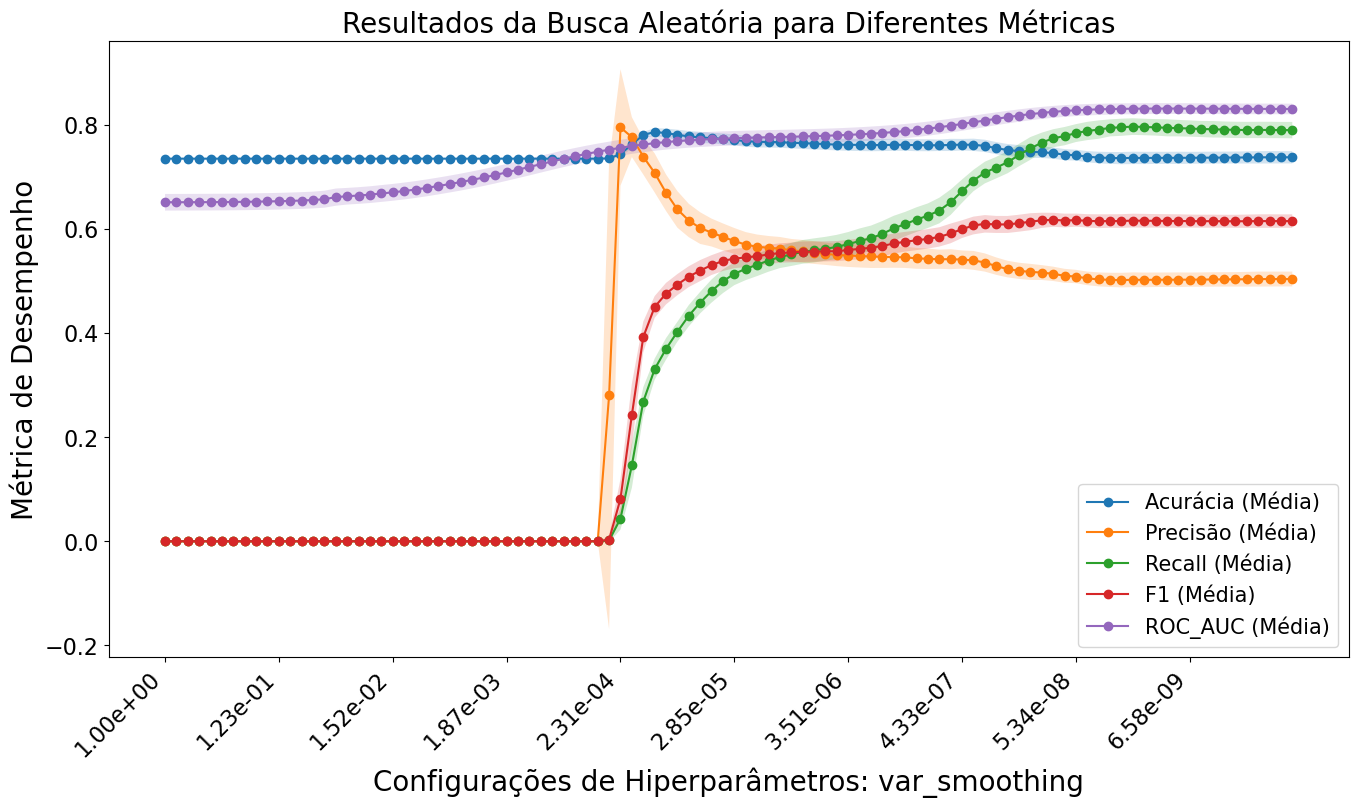

In [177]:
params = results['params']

# Métricas de desempenho a serem plotadas
metrics = {
    'Acurácia': ('mean_test_Acurácia', 'std_test_Acurácia'),
    'Precisão': ('mean_test_Precisão', 'std_test_Precisão'),
    'Recall': ('mean_test_Recall', 'std_test_Recall'),
    'F1': ('mean_test_F1', 'std_test_F1'),
    'ROC_AUC': ('mean_test_ROC_AUC', 'std_test_ROC_AUC')
}

# Converter os resultados em um DataFrame do Pandas
df_results = pd.DataFrame(results)

plt.figure(figsize=(16, 8))

df_results['param_var_smoothing'] = df_results['param_var_smoothing'].apply(lambda x: f'{x:.2e}')

param_strings = df_results['param_var_smoothing']

for metric_name, (mean_key, std_key) in metrics.items():
    mean_metric = df_results[mean_key]
    std_metric = df_results[std_key]
    
    plt.plot(param_strings, mean_metric, marker='o', linestyle='-', label=f'{metric_name} (Média)')
    plt.fill_between(param_strings, mean_metric - std_metric, mean_metric + std_metric, alpha=0.2)

plt.xlabel('Configurações de Hiperparâmetros: var_smoothing', fontsize=20)
plt.ylabel('Métrica de Desempenho', fontsize=20)
plt.title('Resultados da Busca Aleatória para Diferentes Métricas', fontsize=20)

plt.xticks(range(0, len(param_strings), 10), param_strings[::10], rotation=45, fontsize=16, ha='right')
plt.yticks(fontsize=16)
plt.legend(loc='lower right', fontsize=15)
plt.show()

A partir desse gráfico podemos notar então que, conforme diminui o valor do parâmetro var_smoothing (à direita do eixo X), temos uma melhora de forma geral nas métricas de avaliação, chegando a uma ligeira saturação. A precisão é métrica que evolui de forma mais interessante, notamos que há apenas um ponto em que ela salta de qualidade e depois decai. Uma parametrização que buscasse melhorar apenas a precisão geraria um modelo com F1 e recall muito baixos, o que indicaria um desbalanço em favor da precisão. Portanto, o espaço de parâmetros mais interessante está com menores valores de ```var_smoothing```. Como podemos ver, onde o modelo performa o melhor balanço entre as métricas de avaliação é com o maior F1, que consequentemente apresenta bons valores de recall e ROC_AUC, ao custo de uma acurácia não muito baixa.

Para auxiliar esse entendimento, vamos olhar a tabela com os 5 maiores valores de F1:

In [190]:
df_results[['params', 'mean_test_Acurácia','rank_test_Acurácia', 'mean_test_Precisão', 'rank_test_Precisão', 'mean_test_Recall', 'rank_test_Recall', 'mean_test_F1', 'rank_test_F1', 'mean_test_ROC_AUC', 'rank_test_ROC_AUC']].sort_values(by = 'rank_test_F1').head(5)

,params,mean_test_Acurácia,rank_test_Acurácia,mean_test_Precisão,rank_test_Precisão,mean_test_Recall,rank_test_Recall,mean_test_F1,rank_test_F1,mean_test_ROC_AUC,rank_test_ROC_AUC
78,{'var_smoothing': 8.111308307896873e-08},0.745237,38,0.513483,39,0.773842,22,0.617237,1,0.824489,22
80,{'var_smoothing': 5.336699231206302e-08},0.741290,41,0.508350,41,0.783741,20,0.616598,2,0.827536,20
77,{'var_smoothing': 1e-07},0.747012,37,0.515915,38,0.765388,23,0.616274,3,0.822499,23
79,{'var_smoothing': 6.579332246575682e-08},0.742355,40,0.509746,40,0.777855,21,0.615792,4,0.826184,21
85,{'var_smoothing': 1.873817422860383e-08},0.736150,56,0.502098,56,0.796206,1,0.615727,5,0.830499,8


Vamos então selecionar esse parâmetro como o melhor modelo.

In [239]:
params = list(gs_NB.best_params_.values())[0]

m_NB = GaussianNB(var_smoothing=params)

Agora, vamos preparar a exportação do modelo e seguir para a criação da aplicação através do streamlit.

In [238]:
from sklearn.pipeline import Pipeline
import joblib

Rascunho do roteiro:

In [240]:
joblib.dump(m_NB, filename = './modelo/modelo_NB.sav')

['./modelo/modelo_NB.sav']

Exportar o modelo, criar .py do treinamento do modelo, criar .py do streamlit

pipeline: 
- todas as correções e passos, salvar esse script .py [exemplo](https://github.com/codebrain001/customer-churn-prediction/blob/main/preprocessing.py)
- aplicar smote
- aplicar o modelo com os parâmetros tal

Precisa ter:
- objeto .joblib/.sav do modelo
- objeto .joblib/.sav das features
- objeto .joblob/.sav das categorias

A aplicação, uma vez aberta, vai rodar a partir do arquivo com os dados.